# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torch
import torchaudio
from torch.utils.data import DataLoader, Dataset

import IPython.display as ipd

import tensorflow as tf
from tensorflow.keras import layers, models

In [5]:
import tensorflow as tf

# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
import torch

# Check if GPU is available
print("Is GPU available? ", torch.cuda.is_available())

# Print GPU name
if torch.cuda.is_available():
    print("GPU: ", torch.cuda.get_device_name(0))

Is GPU available?  True
GPU:  NVIDIA GeForce RTX 3070


# Exact Dataset Path

In [7]:
#from google.colab import drive
#drive.mount('/content/drive/')

# Replace with your actual dataset folder path
dataset_path = r'C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset'
x = 0
for root, dirs, files in os.walk(dataset_path):

    for file in files:
        if file.endswith('.wav'):  # Assuming your audio files are in .wav format
            print(os.path.join(root, file))
            x = x + 1

#print("Total files = ", x)

C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-01-01-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-01-02-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-01-03-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-02-01-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-02-02-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-02-03-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-03-01-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-03-02-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-03-03-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-02-01-01-01-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-02-01-01-02-01.wav
C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01

# Load Audio Dataset Function

In [8]:
def load_audio_dataset(dataset_path):
    paths = []
    labels = []

    label_mapping = {
        "01": "happy",
        "02": "sad",
        "03": "angry",
        "04": "surprise",
        "05": "neutral"
    }

    for actor in range(1, 35):  # Loop through Actor 01 to Actor 34
        actor_folder = f"Actor {actor:02d}"  # Format as 'Actor 01', 'Actor 02', ...
        actor_path = os.path.join(dataset_path, actor_folder)

        if not os.path.isdir(actor_path):
            continue

        for file in os.listdir(actor_path):
            if file.endswith(".wav"):  # Ensure it's an audio file
                parts = file.split("-")
                if len(parts) < 3:
                    continue

                emotion_label = parts[2]  # 3rd number in filename
                emotion = label_mapping.get(emotion_label, "unknown")

                file_path = os.path.join(actor_path, file)
                paths.append(file_path)
                labels.append(emotion)

    return paths, labels

# Example usage
# current_dir = os.getcwd() # Get the current script directory
# dataset_path = os.path.join(current_dir, "B-SER dataset")
paths, labels = load_audio_dataset(dataset_path)

print(f"Loaded {len(paths)} audio files")
print(f"Sample path: {paths[0]}")
print(f"Sample label: {labels[0]}")

Loaded 1467 audio files
Sample path: C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-01-01-01.wav
Sample label: happy


# KUET and BANGLASER mixing

In [9]:
import os

def load_audio_dataset(dataset_path):
    paths = []
    labels = []

    label_mapping = {
        "01": "happy",
        "02": "sad",
        "03": "angry",
        "04": "surprise",
        "05": "neutral"
    }

    for actor in range(1, 35):  # Loop through Actor 01 to Actor 34
        actor_folder = f"Actor {actor:02d}"  # Format as 'Actor 01', 'Actor 02', ...
        actor_path = os.path.join(dataset_path, actor_folder)

        if not os.path.isdir(actor_path):
            continue

        for file in os.listdir(actor_path):
            if file.endswith(".wav"):  # Ensure it's an audio file
                parts = file.split("-")
                if len(parts) < 3:
                    continue

                emotion_label = parts[2]  # 3rd number in filename
                emotion = label_mapping.get(emotion_label, "unknown")

                file_path = os.path.join(actor_path, file)
                paths.append(file_path)
                labels.append(emotion)

    return paths, labels

def load_mendeley_dataset(dataset_path):
    paths = []
    labels = []

    label_mapping = {
        "Angry (High)": "angry",
        "Angry (Low)": "angry",
        "Disgust (High)": "disgust",
        "Disgust (Low)": "disgust",
        "Happy (High)": "happy",
        "Happy (Low)": "happy",
        "Neutral": "neutral",
        "Sad (High)": "sad",
        "Sad (Low)": "sad"
    }

    for emotion_folder in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion_folder)

        if not os.path.isdir(emotion_path):
            continue

        # Extract label from folder name
        emotion_label = label_mapping.get(emotion_folder)

        if emotion_label is None:
            print(f"Skipping folder {emotion_folder} as it does not match any known emotion")
            continue

        for file in os.listdir(emotion_path):
            if file.endswith(".wav"):
                file_path = os.path.join(emotion_path, file)
                paths.append(file_path)
                labels.append(emotion_label)
            
    return paths, labels

# First dataset
dataset_path = r'C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset'
paths1, labels1 = load_audio_dataset(dataset_path)

# Second dataset
mendeley_dataset_path = r"C:\Users\Jim\Jupiter Projects\CSE499\KUET Bangla Emotional Speech (KBES) Dataset"  # Replace with the actual path
paths2, labels2 = load_mendeley_dataset(mendeley_dataset_path)

# Combine the datasets
paths = paths1 + paths2
labels = labels1 + labels2

print(f"Total Loaded Audio Files: {len(paths)}")
print(f"B-SER dataset size: {len(paths1)}")
print(f"Mendeley dataset size: {len(paths2)}")
print(f"Sample path: {paths[0]}")
print(f"Sample label: {labels[0]}")
print(f"Sample path: {paths[-1]}")
print(f"Sample label: {labels[-1]}")


Total Loaded Audio Files: 2367
B-SER dataset size: 1467
Mendeley dataset size: 900
Sample path: C:\Users\Jim\Jupiter Projects\CSE499\B-SER dataset\Actor 01\03-01-01-01-01-01-01.wav
Sample label: happy
Sample path: C:\Users\Jim\Jupiter Projects\CSE499\KUET Bangla Emotional Speech (KBES) Dataset\Sad (Low)\3-1-1-050.wav
Sample label: sad


# Play Audio Function

In [10]:
def play_audio(file_path, use_ipython=True):
    if use_ipython:
        return ipd.Audio(file_path)
    else:
        audio = AudioSegment.from_wav(file_path)
        play(audio)

# Testing

In [11]:
print(os.listdir(dataset_path))
print(os.listdir(mendeley_dataset_path))

['Actor 01', 'Actor 02', 'Actor 03', 'Actor 04', 'Actor 05', 'Actor 06', 'Actor 07', 'Actor 08', 'Actor 09', 'Actor 10', 'Actor 11', 'Actor 12', 'Actor 13', 'Actor 14', 'Actor 15', 'Actor 16', 'Actor 17', 'Actor 18', 'Actor 19', 'Actor 20', 'Actor 21', 'Actor 22', 'Actor 23', 'Actor 24', 'Actor 25', 'Actor 26', 'Actor 27', 'Actor 28', 'Actor 29', 'Actor 30', 'Actor 31', 'Actor 32', 'Actor 33', 'Actor 34']
['Angry (High)', 'Angry (Low)', 'Disgust (High)', 'Disgust (Low)', 'Happy (High)', 'Happy (Low)', 'Neutral', 'Sad (High)', 'Sad (Low)']


In [12]:
play_audio(paths[0])

In [13]:
# paths[:]

In [14]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

# Create DataFrame

In [15]:
df = pd.DataFrame()
df['audioPaths'] = paths
df['labels'] = labels
df.head()
df = df.drop(df[df['labels'] == 'disgust'].index)

# Dataframe Details

In [16]:
df['labels'].value_counts()

labels
happy       506
sad         506
angry       506
neutral     343
surprise    306
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

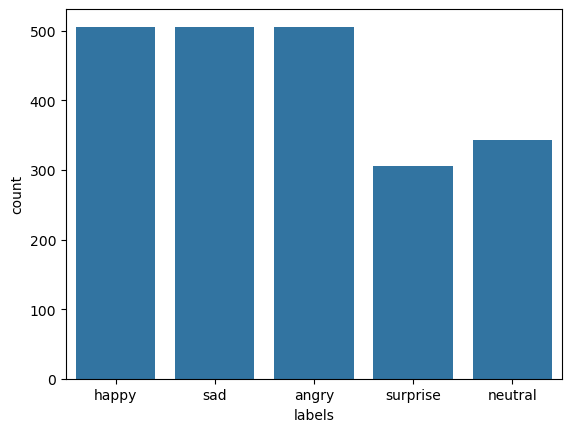

In [17]:
sns.countplot(data = df, x = 'labels')

# Waveplot Functions

In [18]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data,sr = sr)
    plt.show()

In [19]:
def spectogram(data, sr, emmotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')

# Waveplot Test

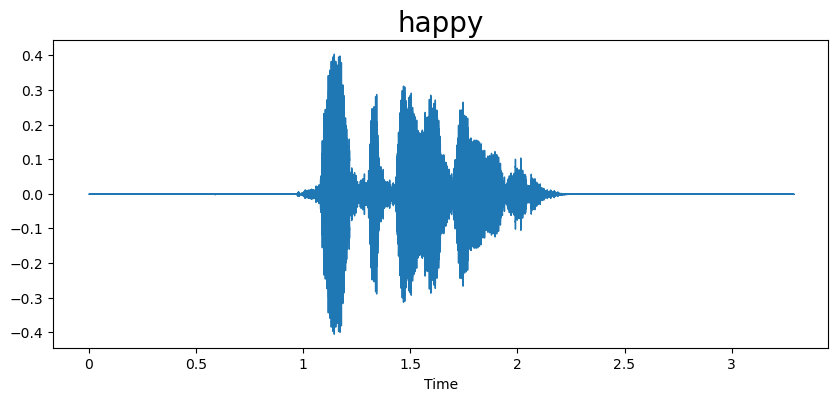

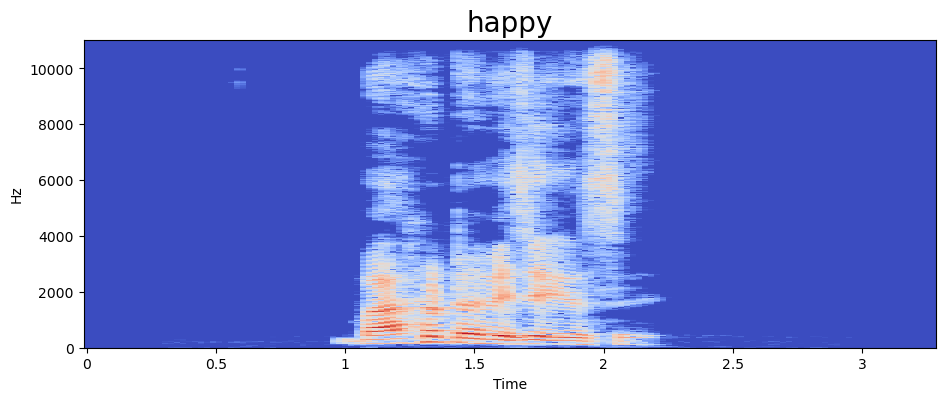

In [20]:
emotion = 'happy'
path = np.array(df['audioPaths'][df['labels'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# Waveplot 1 Example of each Target Class

Emotion: happy


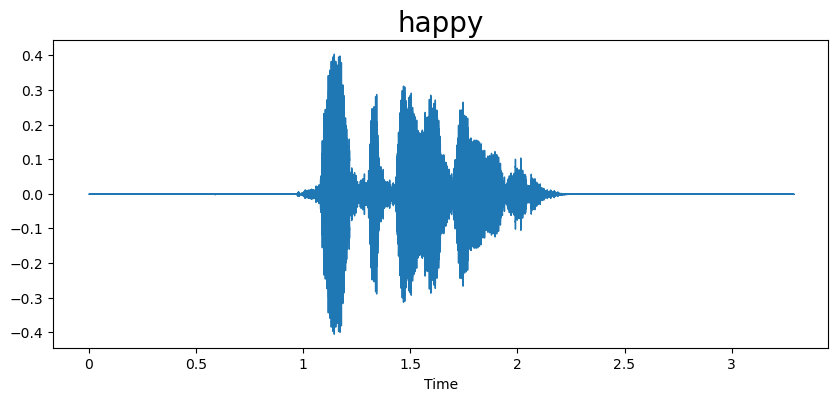


--------------------------------------------------

Emotion: sad


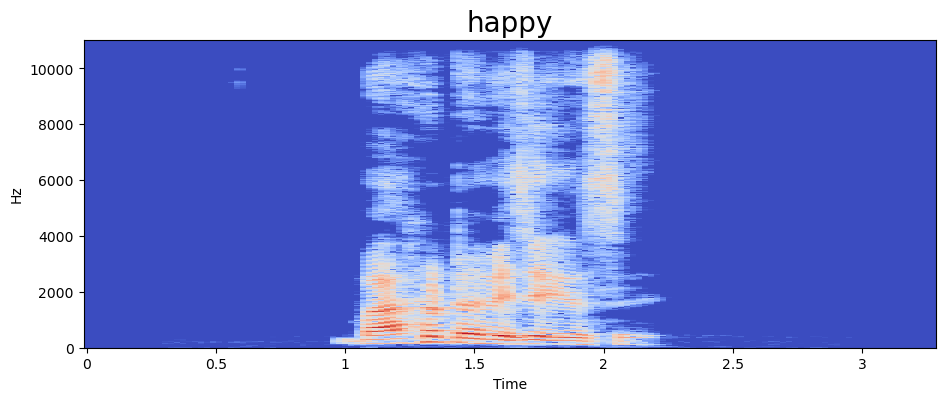

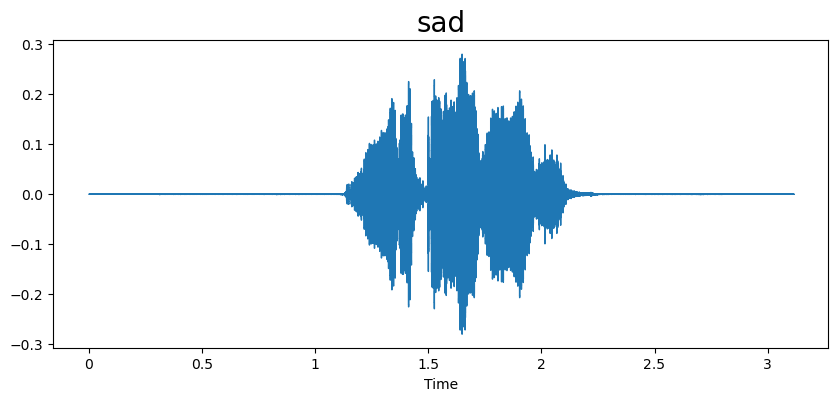


--------------------------------------------------

Emotion: angry


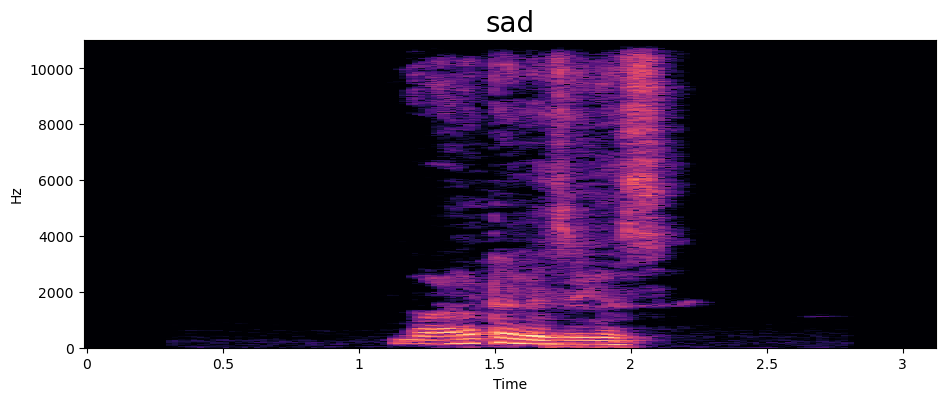

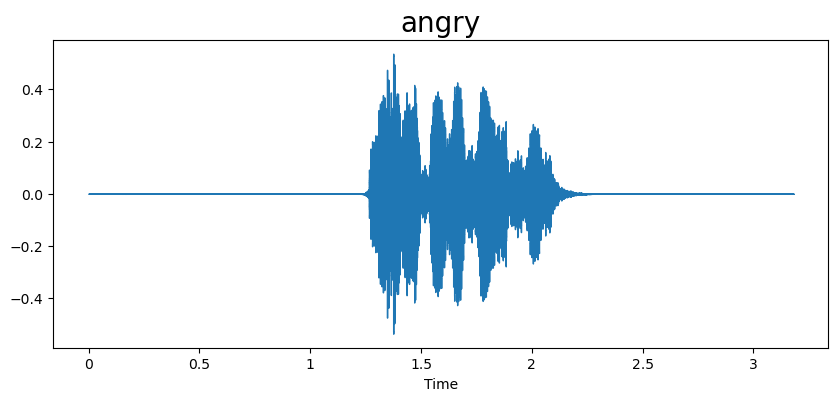


--------------------------------------------------

Emotion: surprise


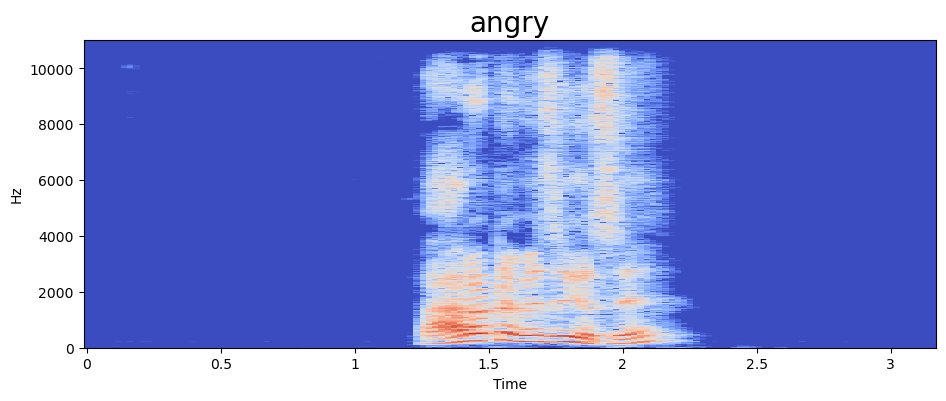

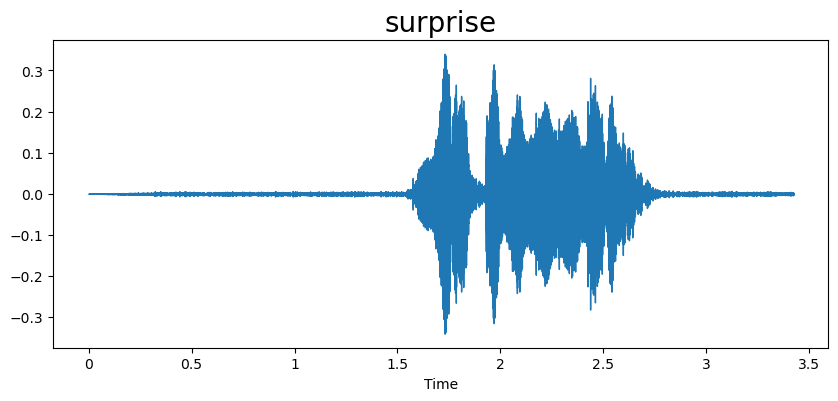


--------------------------------------------------

Emotion: neutral


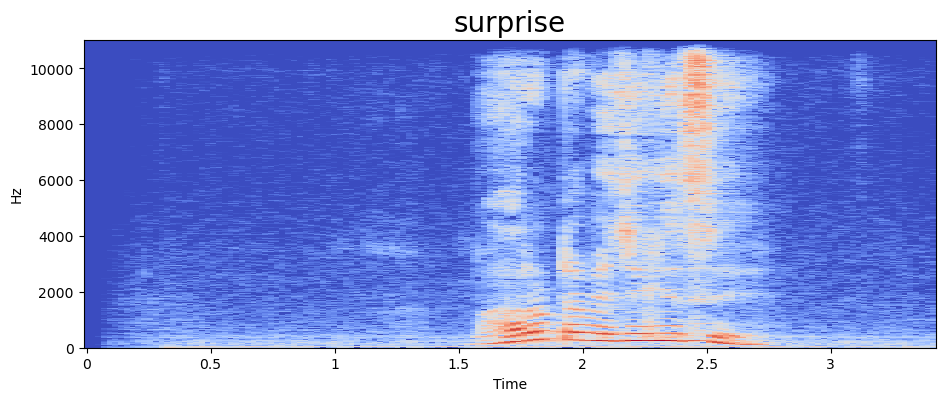

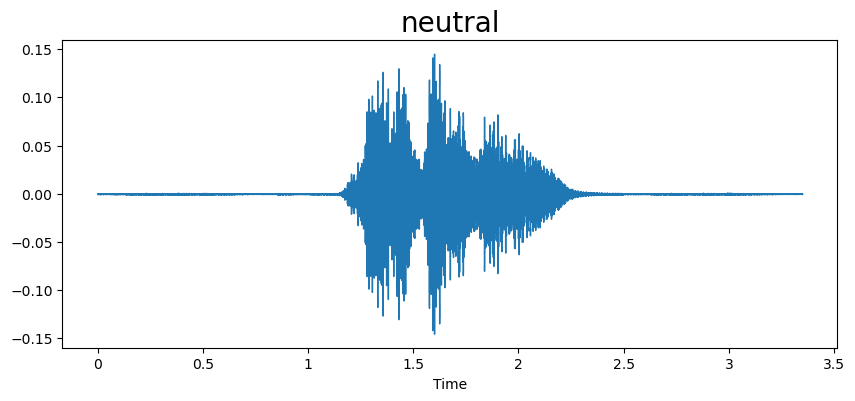


--------------------------------------------------



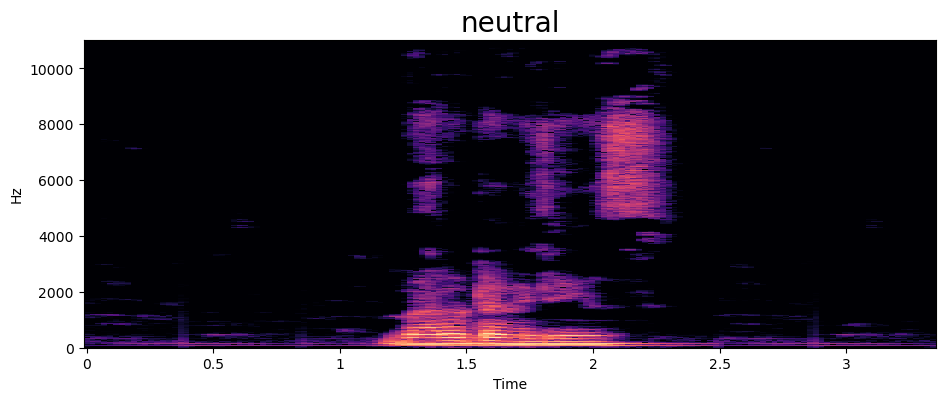

In [21]:
# Get unique emotion classes
unique_emotions = df['labels'].unique()

# Loop through each emotion and display one example
for emotion in unique_emotions:
    path = np.array(df['audioPaths'][df['labels'] == emotion])[0]  # Get one sample for each emotion
    data, sampling_rate = librosa.load(path)

    print(f"Emotion: {emotion}")

    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)

    display(Audio(path))  # Play the audio
    print("\n" + "-"*50 + "\n")  # Separator for clarity

In [22]:
from sklearn.model_selection import train_test_split

def stratified_split(df, test_size=0.15, val_size=0.15):
    train_val_df, test_df = train_test_split(df, test_size=test_size, stratify=df['labels'], random_state=42)

    val_size_adjusted = val_size / (1 - test_size)

    train_df, val_df = train_test_split(train_val_df, test_size=val_size_adjusted, stratify=train_val_df['labels'], random_state=42)

    return train_df, val_df, test_df

# Define split ratios
train_ratio = 0.7
val_ratio = 0.10
test_ratio = 0.20

# Perform stratified split
train_df, val_df, test_df = stratified_split(df, test_size=test_ratio, val_size=val_ratio)

# Verify distribution of emotion classes in each split
train_distribution = train_df['labels'].value_counts(normalize=True)
val_distribution = val_df['labels'].value_counts(normalize=True)
test_distribution = test_df['labels'].value_counts(normalize=True)

print("Train set distribution:", train_distribution)
print("Validation set distribution:", val_distribution)
print("Test set distribution:", test_distribution)

Train set distribution: labels
happy       0.233509
angry       0.233509
sad         0.233509
neutral     0.158311
surprise    0.141161
Name: proportion, dtype: float64
Validation set distribution: labels
happy       0.235023
angry       0.235023
sad         0.230415
neutral     0.156682
surprise    0.142857
Name: proportion, dtype: float64
Test set distribution: labels
sad         0.235023
angry       0.232719
happy       0.232719
neutral     0.158986
surprise    0.140553
Name: proportion, dtype: float64


In [23]:
def check_audio_length(file_path):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)  # sr=None keeps the original sampling rate

    # Calculate the duration
    duration = len(audio) / sr  # Duration in seconds
    return duration

# Example usage:
train_df['audio_length'] = train_df['audioPaths'].apply(check_audio_length)

val_df['audio_length'] = val_df['audioPaths'].apply(check_audio_length)
test_df['audio_length'] = test_df['audioPaths'].apply(check_audio_length)

print(train_df[['audioPaths', 'audio_length']])
print(val_df[['audioPaths', 'audio_length']])
print(test_df[['audioPaths', 'audio_length']])


                                             audioPaths  audio_length
1938  C:\Users\Jim\Jupiter Projects\CSE499\KUET Bang...      3.018604
243   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.383688
1421  C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.156054
703   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.522426
1876  C:\Users\Jim\Jupiter Projects\CSE499\KUET Bang...      3.018604
...                                                 ...           ...
1050  C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.102971
232   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.185333
783   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.154667
570   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.713125
273   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.634833

[1516 rows x 2 columns]
                                             audioPaths  audio_length
436   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...      3.11

In [24]:
# Define the target length in samples (3.5 seconds at 44.1 kHz)
target_length = int(3.5 * 44100)

def standardize_audio_length(file_path, target_length):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=44100)

    # Standardize the length
    if len(audio) < target_length:
        # Zero padding for shorter files
        audio = np.pad(audio, (0, target_length - len(audio)))
    elif len(audio) > target_length:
        # Truncate longer files
        audio = audio[:target_length]

    return audio

# Apply the standardization to all audio files in the dataframe
train_df['standardized_audio'] = train_df['audioPaths'].apply(lambda x: standardize_audio_length(x, target_length))
val_df['standardized_audio'] = val_df['audioPaths'].apply(lambda x: standardize_audio_length(x, target_length))
test_df['standardized_audio'] = test_df['audioPaths'].apply(lambda x: standardize_audio_length(x, target_length))

In [25]:
def check_audio_length(audio, sr=44100):
    # Calculate the duration
    duration = len(audio) / sr  # Duration in seconds
    return duration
train_df['audio_length'] = train_df['standardized_audio'].apply(lambda x: check_audio_length(x))
print(train_df[['audioPaths', 'audio_length']])

val_df['audio_length'] = val_df['standardized_audio'].apply(lambda x: check_audio_length(x))
print(val_df[['audioPaths', 'audio_length']])

test_df['audio_length'] = test_df['standardized_audio'].apply(lambda x: check_audio_length(x))
print(test_df[['audioPaths', 'audio_length']])

from IPython.display import Audio

# Function to play audio
def play_audio(audio, sr=44100):
    return Audio(audio, rate=sr)

# Play the first 5 standardized audio files
for i in range(5):
    print(f"Playing audio file {i+1}:")
    display(play_audio(train_df['standardized_audio'].iloc[i]))
    display(train_df['standardized_audio'].iloc[i])


                                             audioPaths  audio_length
1938  C:\Users\Jim\Jupiter Projects\CSE499\KUET Bang...           3.5
243   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
1421  C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
703   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
1876  C:\Users\Jim\Jupiter Projects\CSE499\KUET Bang...           3.5
...                                                 ...           ...
1050  C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
232   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
783   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
570   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5
273   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...           3.5

[1516 rows x 2 columns]
                                             audioPaths  audio_length
436   C:\Users\Jim\Jupiter Projects\CSE499\B-SER dat...          

array([-0.00209518, -0.00764848, -0.01462889, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

Playing audio file 2:


array([-9.572772e-06,  2.816946e-05, -3.707769e-05, ...,  0.000000e+00,
        0.000000e+00,  0.000000e+00], dtype=float32)

Playing audio file 3:


array([-1.5258789e-05,  1.0681152e-04,  1.5258789e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

Playing audio file 4:


array([1.0681152e-04, 1.0681152e-04, 6.1035156e-05, ..., 2.5939941e-04,
       1.5258789e-04, 2.2888184e-04], dtype=float32)

Playing audio file 5:


array([-0.06738435, -0.09680184, -0.09015036, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [26]:
def extract_mfcc(audio, sr=44100, n_mfcc=40, n_fft=1024, hop_length=512):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfcc

def pad_or_truncate(mfcc, target_length=300):
    if mfcc.shape[1] < target_length:
        pad_width = target_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :target_length]
    return mfcc

# Apply MFCC extraction to the standardized audio data
# df['mfcc_features'] = df['standardized_audio'].apply(lambda x: extract_mfcc(x))
train_df['mfcc_features'] = train_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))

print("MFCC shape for the first 5 samples:")
for i in range(5):
    display(train_df['mfcc_features'].iloc[i])
    print(f"Sample {i+1}: {train_df['mfcc_features'].iloc[i].shape}")

MFCC shape for the first 5 samples:


array([[-287.29694  , -279.4651   , -284.90054  , ..., -665.27167  ,
        -665.27167  , -665.27167  ],
       [ 212.42313  ,  174.31844  ,  187.88228  , ...,    0.       ,
           0.       ,    0.       ],
       [ -41.731796 ,  -63.27271  ,  -54.45105  , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [  -4.430805 ,   -9.298189 ,   -5.150523 , ...,    0.       ,
           0.       ,    0.       ],
       [  -4.7358007,   -9.127092 ,   -6.4398904, ...,    0.       ,
           0.       ,    0.       ],
       [  -1.79772  ,   -8.037619 ,   -2.0043826, ...,    0.       ,
           0.       ,    0.       ]], dtype=float32)

Sample 1: (40, 300)


array([[-673.385, -673.385, -673.385, ..., -673.385, -673.385, -673.385],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ]],
      dtype=float32)

Sample 2: (40, 300)


array([[-7.3560529e+02, -7.3408203e+02, -7.3230865e+02, ...,
        -7.4794238e+02, -7.4794238e+02, -7.4794238e+02],
       [ 1.6957281e+01,  1.8322018e+01,  2.1288301e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.5550669e+01,  1.6137384e+01,  1.8995386e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-2.3800042e+00, -2.5687432e+00, -4.4833899e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.4791884e+00, -2.2904656e+00, -3.2547884e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-4.6865386e-01, -1.5560023e+00, -1.7024081e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

Sample 3: (40, 300)


array([[-5.4732159e+02, -5.4716345e+02, -5.4711432e+02, ...,
        -5.4732159e+02, -5.4654004e+02, -5.4732159e+02],
       [ 0.0000000e+00,  2.2356461e-01,  2.9307961e-01, ...,
         0.0000000e+00,  1.1047812e+00,  0.0000000e+00],
       [ 0.0000000e+00,  2.2340013e-01,  2.9290295e-01, ...,
         0.0000000e+00,  1.1030059e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  1.5732047e-01,  2.2060229e-01, ...,
         0.0000000e+00,  4.8608336e-01,  0.0000000e+00],
       [ 0.0000000e+00,  1.5416445e-01,  2.1710333e-01, ...,
         0.0000000e+00,  4.6163380e-01,  0.0000000e+00],
       [ 0.0000000e+00,  1.5097219e-01,  2.1355858e-01, ...,
         0.0000000e+00,  4.3739188e-01,  0.0000000e+00]], dtype=float32)

Sample 4: (40, 300)


array([[-3.1251453e+02, -4.4053439e+02, -4.7448013e+02, ...,
        -6.2406494e+02, -6.2406494e+02, -6.2406494e+02],
       [ 1.4435036e+02,  1.4819141e+02,  1.4693135e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.4684877e+00,  2.3369854e+01,  5.4671890e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 3.8238339e+00, -5.5747128e+00, -1.2558893e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.5500026e+00,  9.5692730e-01, -7.3812699e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.3736925e+00, -4.0920138e-02, -4.6384411e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

Sample 5: (40, 300)


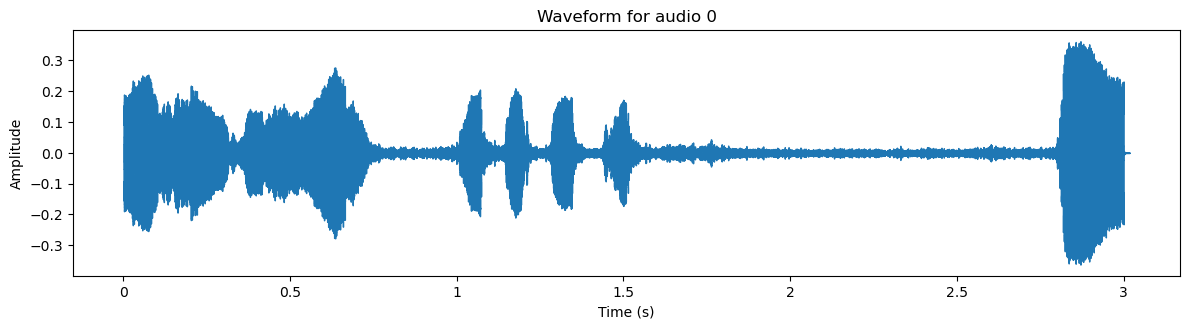

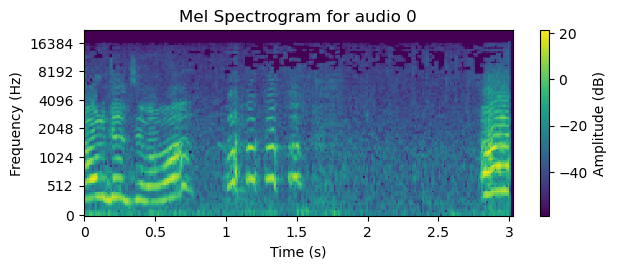

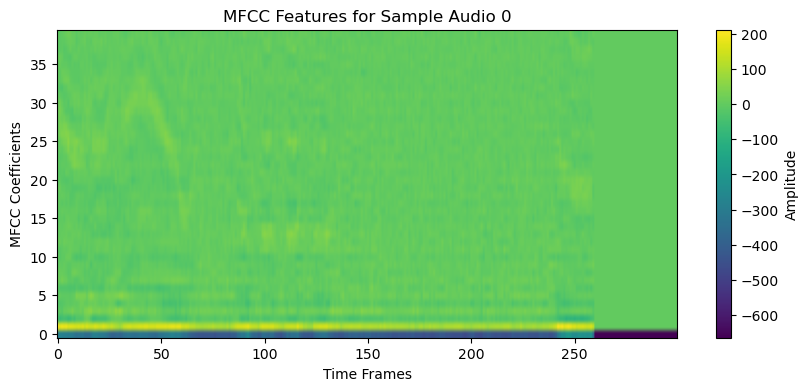

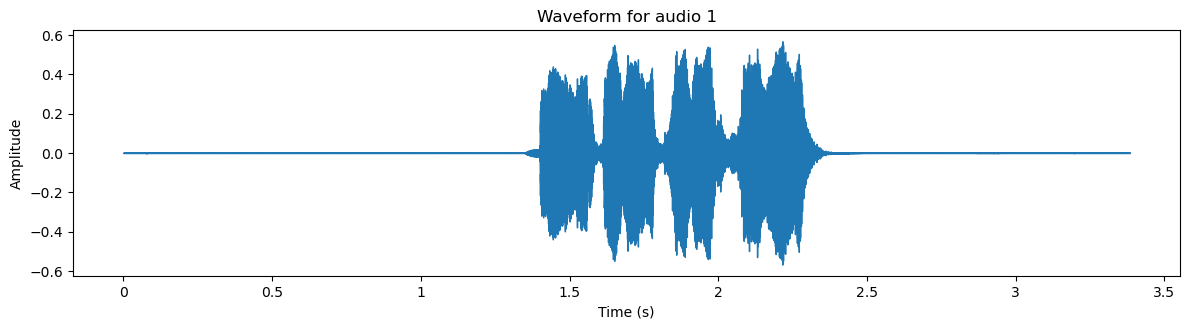

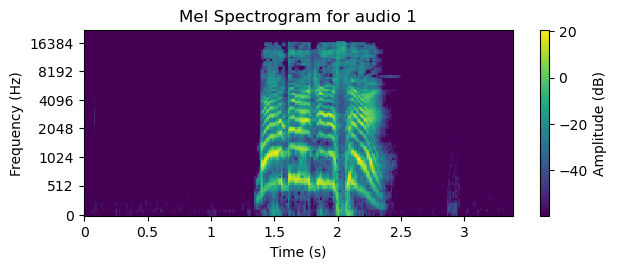

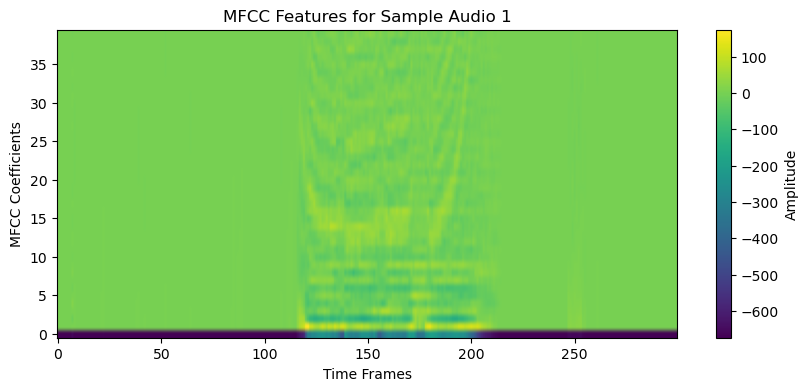

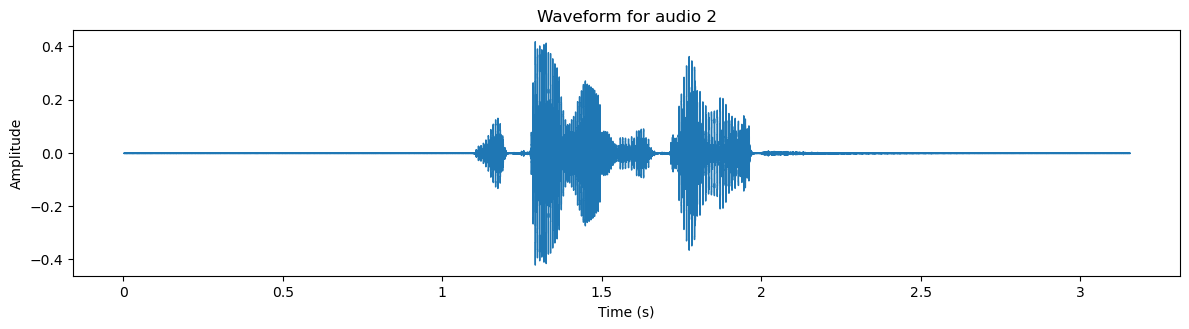

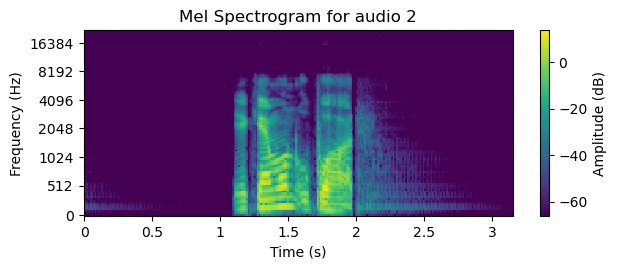

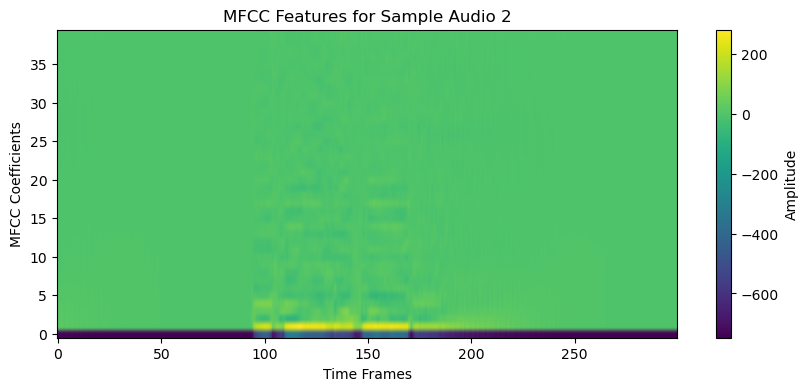

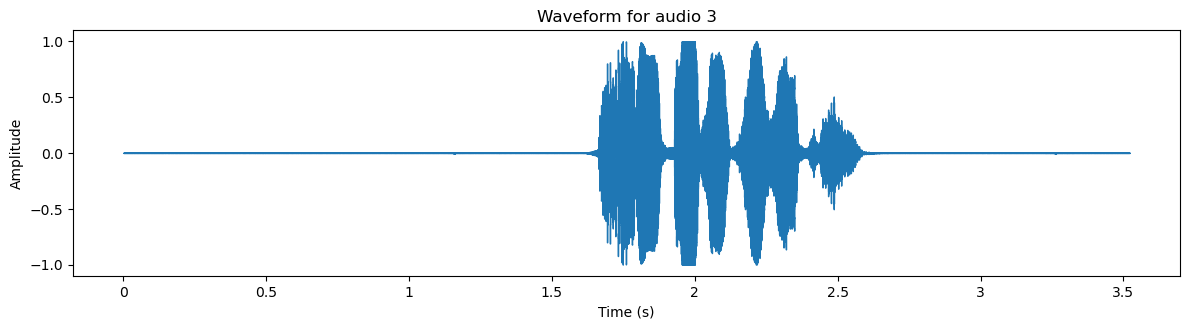

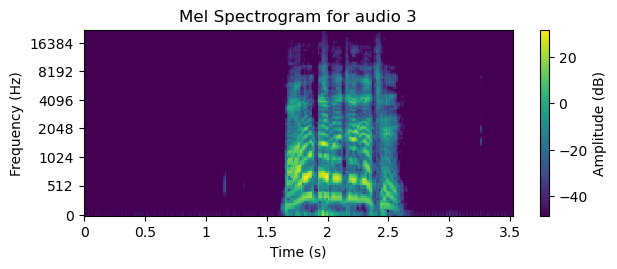

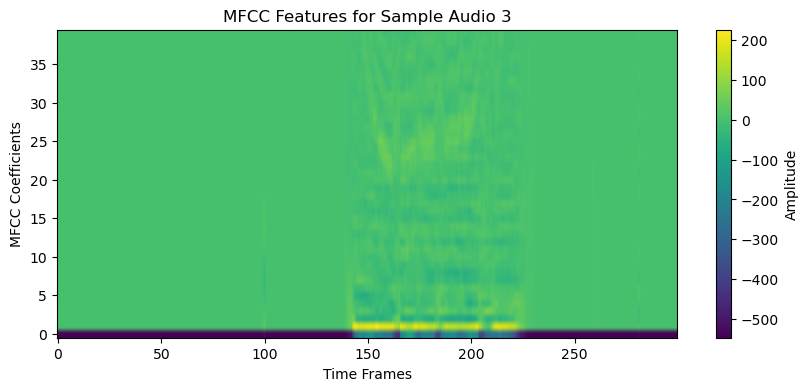

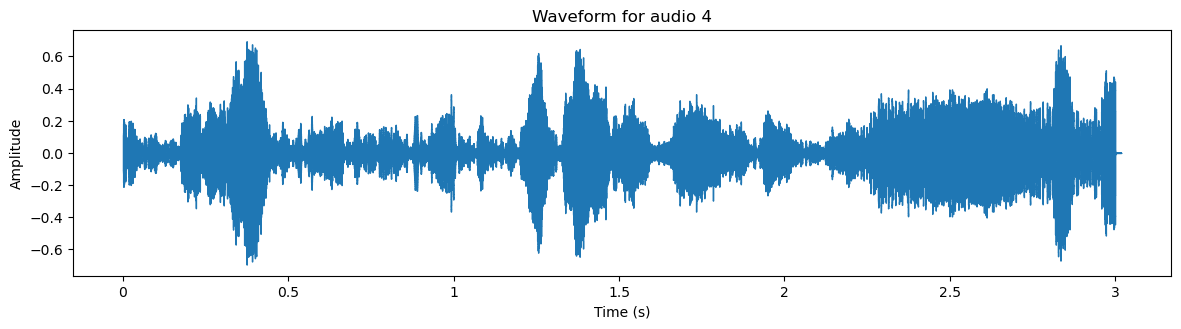

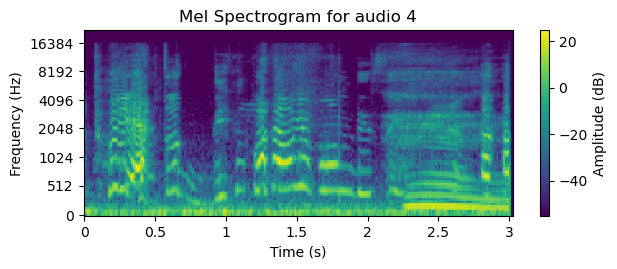

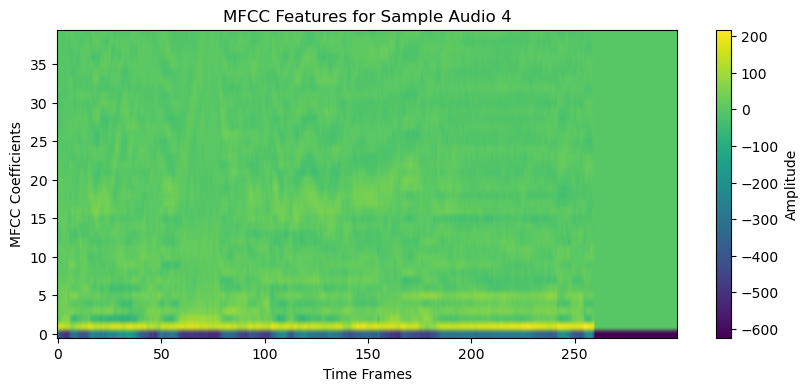

In [27]:
# Plot waveform and spectrogram for comparison
import librosa.display

# file_path = df['audioPaths'].iloc[1466]  # Path to the same sample audio
# audio, sr = librosa.load(file_path, sr=44100)

# plt.figure(figsize=(12, 6))

# Plot waveform
def showwave(audio,num):
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)
  librosa.display.waveshow(audio, sr=sr)
  plt.title('Waveform for audio ' + str(num))
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.tight_layout()
  plt.show()

# Plot spectrogram
def showspec(audio,num):
  plt.subplot(2, 1, 2)
  spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024, hop_length=512)
  log_spectrogram = librosa.power_to_db(spectrogram)
  librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
  plt.title('Mel Spectrogram for audio ' + str(num))
  plt.colorbar(label='Amplitude (dB)')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.tight_layout()
  plt.show()

# plt.tight_layout()
# plt.show()

# Select a sample MFCC from the dataframe for visualization
# sample_mfcc = df['mfcc_features'].iloc[1466]  # Select the first audio file's MFCC features

def showmfcc(mfcc,num):
  # Plot the MFCC features
  plt.figure(figsize=(10, 4))
  plt.imshow(sample_mfcc, aspect='auto', origin='lower', cmap='viridis')
  plt.title('MFCC Features for Sample Audio ' + str(num))
  plt.xlabel('Time Frames')
  plt.ylabel('MFCC Coefficients')
  plt.colorbar(label='Amplitude')
  plt.show()


for i in range(5):
  file_path = train_df['audioPaths'].iloc[i]  # Path to the same sample audio
  audio, sr = librosa.load(file_path, sr=44100)
  sample_mfcc = train_df['mfcc_features'].iloc[i]  # Select the first audio file's MFCC features
  showwave(audio,i)
  showspec(audio,i)
  showmfcc(sample_mfcc,i)



In [28]:
# # Define the Fully Connected Network
# def create_fully_connected_network(input_dim, num_classes):
#     model = models.Sequential([
#         # Input layer (flattened MFCC features)
#         layers.Input(shape=(input_dim,)),

#         # First hidden layer with 1024 units and ReLU activation
#         layers.Dense(1024, activation='relu'),

#         # Second hidden layer with 512 units and ReLU activation
#         layers.Dense(512, activation='relu'),

#         # Output layer with 'num_classes' units and softmax activation
#         layers.Dense(num_classes, activation='softmax')
#     ])

#     return model

# # Parameters
# input_dim = 40 * 300  # Flattened MFCC dimensions (40 coefficients × 300 frames)
# num_classes = 5       # Number of target classes

# # Create the model
# model = create_fully_connected_network(input_dim, num_classes)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Print the model summary
# model.summary()

# Import model libraries

In [29]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Preparing stuff for model

In [30]:
# 1. Flatten MFCC Features
def flatten_mfcc(dataframe):
    dataframe['flattened_mfcc'] = dataframe['mfcc_features'].apply(lambda x: x.flatten())
    return np.array(dataframe['flattened_mfcc'].tolist())

train_df['mfcc_features'] = train_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))
val_df['mfcc_features'] = val_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))
test_df['mfcc_features'] = test_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))

# Flatten MFCC features for train, validation, and test sets
X_train = flatten_mfcc(train_df)
X_val = flatten_mfcc(val_df)
X_test = flatten_mfcc(test_df)

# 2. Prepare Labels
target_mapping = {'happy': 0, 'sad': 1, 'angry': 2, 'surprise': 3, 'neutral': 4}  #, 'disgust': 5heaheadhhhefkuhrfgkjhrg;kjhrsg;kj;ksrjgbserfgsghhehehehehkwa
y_train = np.array([target_mapping[label] for label in train_df['labels']])
y_val = np.array([target_mapping[label] for label in val_df['labels']])
y_test = np.array([target_mapping[label] for label in test_df['labels']])

# Convert labels to categorical format
y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# Creating model for first time (No need to run everytime else will overwrite)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Define your model
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FullyConnectedNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout
        x = self.softmax(self.fc3(x))
        return x

# Initialize weights using Kaiming (He) initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
        torch.nn.init.zeros_(m.bias)

# Early Stopping and Model Checkpointing
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = np.inf
        self.wait = 0
        self.stopped_epoch = 0
        self.best_model_state = None

    def __call__(self, val_loss, model, epoch):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.wait = 0
            self.best_model_state = model.state_dict()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                return True
        return False

# Updated evaluate_model with weighted accuracy
def evaluate_model(model, test_loader, criterion, class_weights=None):
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    
    # Compute weighted accuracy if class_weights provided
    weighted_acc = None
    if class_weights is not None:
        weighted_acc = accuracy_score(
            all_labels, all_preds, 
            sample_weight=[class_weights[i] for i in all_labels]
        ) * 100
    
    return test_loss, test_accuracy, weighted_acc

# Function to plot training and validation metrics
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=5):
    early_stopping = EarlyStopping(patience=patience)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Training metrics
        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Validation metrics
        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print metrics
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
        print("------------------------")

        # Early stopping check
        if early_stopping(val_loss, model, epoch):
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Load the best model state (if available)
    if early_stopping.best_model_state is not None:
        model.load_state_dict(early_stopping.best_model_state)
        print("Best model restored.")
    else:
        print("No improvement during training; using final model.")

    # Plot metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert features and labels to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader objects
batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch [1/50]
Train Loss: 1.6114, Train Acc: 23.94%
Val Loss: 1.4696, Val Acc: 41.01%
------------------------
Epoch [2/50]
Train Loss: 1.4478, Train Acc: 45.12%
Val Loss: 1.4220, Val Acc: 45.16%
------------------------
Epoch [3/50]
Train Loss: 1.3640, Train Acc: 53.83%
Val Loss: 1.4071, Val Acc: 47.47%
------------------------
Epoch [4/50]
Train Loss: 1.3097, Train Acc: 59.17%
Val Loss: 1.4046, Val Acc: 47.47%
------------------------
Epoch [5/50]
Train Loss: 1.2543, Train Acc: 63.98%
Val Loss: 1.3705, Val Acc: 50.69%
------------------------
Epoch [6/50]
Train Loss: 1.2362, Train Acc: 64.71%
Val Loss: 1.3730, Val Acc: 49.31%
------------------------
Epoch [7/50]
Train Loss: 1.2027, Train Acc: 67.55%
Val Loss: 1.3798, Val Acc: 47.47%
------------------------
Epoch [8/50]
Train Loss: 1.1816, Train Acc: 70.12%
Val Loss: 1.3696, Val Acc: 48.85%
------------------------
Epoch [9/50]
Train Loss: 1.1610, Train Acc: 72.63%
Val Loss: 1.3533, Val Acc: 53.00%
------------------------
Epoch [10/

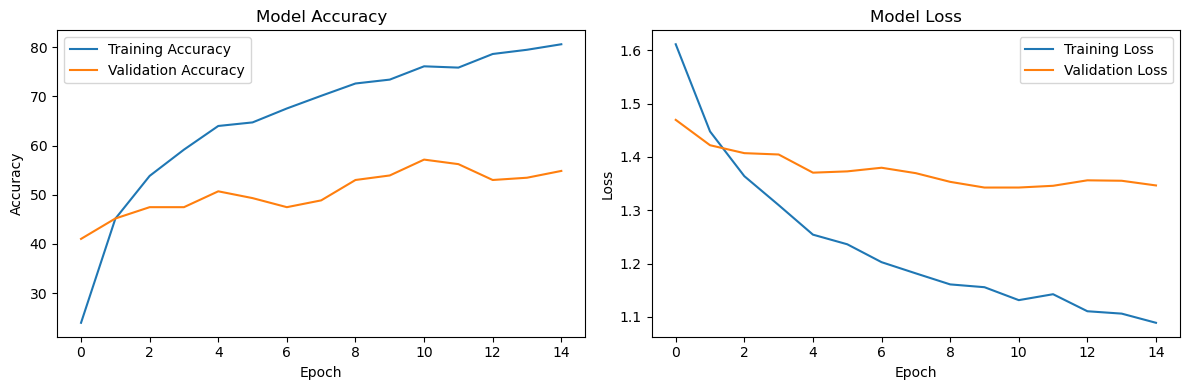

Test Loss: 1.2217, Accuracy: 66.13%, Weighted Accuracy: 67.68%


In [34]:
# Parameters
input_dim = X_train.shape[1]  # Flattened MFCC dimension
num_classes = 5



# Create and initialize model
model = FullyConnectedNetwork(input_dim, num_classes)
model.apply(init_weights)

# Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights_np = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32).to(device)
# Define loss with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Added class weights
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Train
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, patience=5)

# Save model
torch.save(model.state_dict(), 'best_model.pth')

# Evaluate with weighted accuracy
test_loss, test_acc, weighted_acc = evaluate_model(
    model, test_loader, criterion, class_weights_np  # Pass numpy array for sklearn
)
print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%, Weighted Accuracy: {weighted_acc:.2f}%")

# Training the model

In [35]:
from torchsummary import summary
# Print the model summary
input_size = (input_dim,)  # Input shape (batch size is omitted)
summary(model, input_size=input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       6,144,512
              ReLU-2                  [-1, 512]               0
           Dropout-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
              ReLU-5                  [-1, 256]               0
           Dropout-6                  [-1, 256]               0
            Linear-7                    [-1, 5]           1,285
           Softmax-8                    [-1, 5]               0
Total params: 6,277,125
Trainable params: 6,277,125
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.02
Params size (MB): 23.95
Estimated Total Size (MB): 24.01
----------------------------------------------------------------


In [36]:
def get_predictions(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred

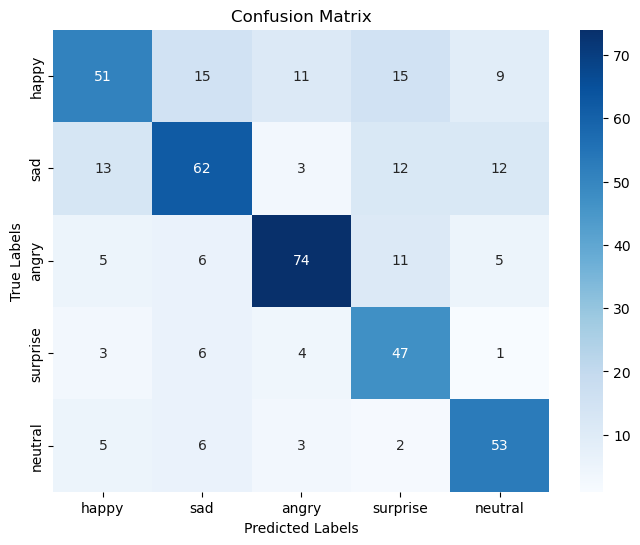

Accuracy: 0.6613
Precision: 0.6701
Recall: 0.6613
F1-Score: 0.6594

Class: happy
  Precision: 0.6623
  Recall: 0.5050
  F1-Score: 0.5730

Class: sad
  Precision: 0.6526
  Recall: 0.6078
  F1-Score: 0.6294

Class: angry
  Precision: 0.7789
  Recall: 0.7327
  F1-Score: 0.7551

Class: surprise
  Precision: 0.5402
  Recall: 0.7705
  F1-Score: 0.6351

Class: neutral
  Precision: 0.6625
  Recall: 0.7681
  F1-Score: 0.7114



In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_true, y_pred = get_predictions(model, test_loader)




# Generate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['happy', 'sad', 'angry', 'surprise', 'neutral']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'macro' for unweighted average
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()
# Compute class-wise metrics
precision_class = precision_score(y_true, y_pred, average=None)
recall_class = recall_score(y_true, y_pred, average=None)
f1_class = f1_score(y_true, y_pred, average=None)

# Print class-wise metrics
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"  Precision: {precision_class[i]:.4f}")
    print(f"  Recall: {recall_class[i]:.4f}")
    print(f"  F1-Score: {f1_class[i]:.4f}")
    print()

# Displaying confusion matrix

Unique labels in y_true: [0 1 2 3 4]
Unique labels in y_pred: [0 1 2 3 4]


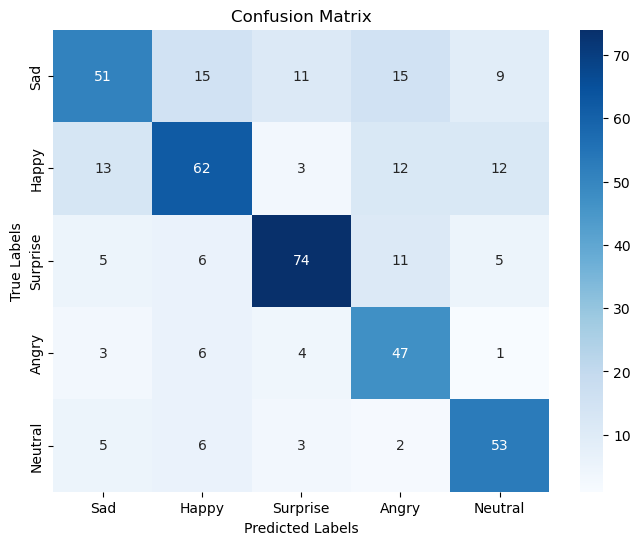

Classification Report:
              precision    recall  f1-score   support

         Sad       0.66      0.50      0.57       101
       Happy       0.65      0.61      0.63       102
    Surprise       0.78      0.73      0.76       101
       Angry       0.54      0.77      0.64        61
     Neutral       0.66      0.77      0.71        69

    accuracy                           0.66       434
   macro avg       0.66      0.68      0.66       434
weighted avg       0.67      0.66      0.66       434

Overall Accuracy: 0.6613


In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Function to get predictions from the model
def get_predictions(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    y_true = []
    y_pred = []

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Get predicted class indices
            _, predicted = torch.max(outputs.data, 1)

            # Append true and predicted labels
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return np.array(y_true), np.array(y_pred)

# Get predictions
y_true, y_pred = get_predictions(model, test_loader)

# Check class distribution
print("Unique labels in y_true:", np.unique(y_true))
print("Unique labels in y_pred:", np.unique(y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names
class_names = ['Sad', 'Happy', 'Surprise', 'Angry', 'Neutral']  # Replace with your class names

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and accuracy
report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0)
accuracy = accuracy_score(y_true, y_pred)

print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy:.4f}")

# Using proposed model -  CNN-Transformer Hybrid Approach

In [39]:
# Extract MFCC features
train_df['mfcc_features'] = train_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))
val_df['mfcc_features'] = val_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))
test_df['mfcc_features'] = test_df['standardized_audio'].apply(lambda x: pad_or_truncate(extract_mfcc(x)))

# Reshape MFCC features for train, validation, and test sets
X_train = np.stack(train_df['mfcc_features'].values).transpose(0, 2, 1) # Shape (batch_size, 300, 40)
X_val = np.stack(val_df['mfcc_features'].values).transpose(0, 2, 1)     # Shape (batch_size, 300, 40)
X_test = np.stack(test_df['mfcc_features'].values).transpose(0, 2, 1)   # Shape (batch_size, 300, 40)

# Prepare Labels
target_mapping = {'happy': 0, 'sad': 1, 'angry': 2, 'surprise': 3, 'neutral': 4, 'disgust': 5}
y_train = np.array([target_mapping[label] for label in train_df['labels']])
y_val = np.array([target_mapping[label] for label in val_df['labels']])
y_test = np.array([target_mapping[label] for label in test_df['labels']])

# Convert labels to categorical format
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# Verify shapes
print("X_train shape:", X_train.shape)       # Should be (num_samples_train, 300, 40)
print("X_val shape:", X_val.shape)           # Should be (num_samples_val, 300, 40)
print("X_test shape:", X_test.shape)         # Should be (num_samples_test, 300, 40)
print("y_train_cat shape:", y_train_cat.shape) # Should be (num_samples_train, num_classes=5)
print("y_val_cat shape:", y_val_cat.shape)     # Should be (num_samples_val, num_classes=5)
print("y_test_cat shape:", y_test_cat.shape)   # Should be (num_samples_test, num_classes=5)


X_train shape: (1516, 300, 40)
X_val shape: (217, 300, 40)
X_test shape: (434, 300, 40)
y_train_cat shape: (1516, 5)
y_val_cat shape: (217, 5)
y_test_cat shape: (434, 5)


## Defining the CNN-Transformer Hybrid Model

In [40]:
from tensorflow.keras.regularizers import l2
# CNN Backbone (Increased filters)
def build_cnn_backbone(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Conv1D Stack with More Filters
    x = layers.Conv1D(filters=512, kernel_size=5, strides=1, padding="same", activation="relu",
                      kernel_regularizer=l2(0.01))(inputs)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu',
                      kernel_regularizer=l2(0.01))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu',
                      kernel_regularizer=l2(0.01))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(filters=128, kernel_size=10, strides=10, padding='valid', activation='relu',
                      kernel_regularizer=l2(0.01))(x)
    x = layers.Dropout(0.3)(x)

    return models.Model(inputs, x, name="cnn_backbone")

# Transformer Encoder (Increased complexity)
def build_transformer_encoder(input_shape, num_heads=6, ff_dim=512, num_layers=3):
    inputs = layers.Input(shape=input_shape)

    # Positional Encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    positions = layers.Embedding(input_dim=input_shape[0], output_dim=128)(positions)  # Increased Embedding
    x = inputs + positions

    # Transformer Encoder Stack
    for _ in range(num_layers):
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=128)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        ffn_output = layers.Dense(ff_dim, activation='relu')(x)
        ffn_output = layers.Dense(128)(ffn_output)  # Match embedding size
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn_output)

    return models.Model(inputs, x, name="transformer_encoder")

# Full Model
def build_model(input_shape, num_classes):
    # CNN Backbone
    cnn_backbone = build_cnn_backbone(input_shape)

    # Transformer Encoder
    transformer_input_shape = cnn_backbone.output_shape[1:]
    transformer_encoder = build_transformer_encoder(transformer_input_shape)

    # Combine CNN and Transformer
    cnn_output = cnn_backbone.output
    transformer_output = transformer_encoder(cnn_output)
    combined_output = layers.Concatenate(axis=-1)([cnn_output, transformer_output])

    # Global Average Pooling Instead of Flatten
    x = layers.GlobalAveragePooling1D()(combined_output)
    x = layers.Dense(256, activation="relu")(x)  # Increase Dense Layer Size
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(cnn_backbone.input, outputs, name="cnn_transformer_model")

# Reshape input data
X_train = X_train.reshape(-1, 300, 40)
X_val = X_val.reshape(-1, 300, 40)

# Build and Compile the Model
model = build_model((300, 40), num_classes=5)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "cnn_transformer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 300, 40)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d (Conv1D)               │ (None, 300, 512)          │         102,912 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 300, 512)          │           2,048 │ conv1d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_1 (Conv1D)             │ (None, 300, 256)          │         393,472 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 300, 256)          │           1,024 │ conv1d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_2 (Conv1D)             │ (None, 300, 128)          │          98,432 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 300, 128)          │             512 │ conv1d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_3 (Conv1D)             │ (None, 30, 128)           │         163,968 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 30, 128)           │               0 │ conv1d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ transformer_encoder           │ (None, 30, 128)           │       1,583,616 │ dropout[0][0]              │
│ (Functional)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 30, 256)           │               0 │ dropout[0][0],             │
│                               │                           │                 │ transformer_encoder[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 256)               │               0 │ concatenate[0][0]          │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 256)               │          65,792 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 256)               │               0 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,413,061 (9.21 MB)

 Trainable params: 2,411,269 (9.20 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [42]:
# Compute Class Weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('cnn-transformer.h5', monitor='val_loss', save_best_only=True)
]

# Train the Model
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat),
                    epochs=50, batch_size=32, class_weight=class_weights_dict,
                    callbacks=callbacks)

TypeError: EarlyStopping.__init__() got an unexpected keyword argument 'monitor'

In [43]:
X_test = X_test.reshape(-1, 300, 40)  # Reshape to (294, 300, 40)

print("X_test shape:", X_test.shape)
print("y_test_cat shape:", y_test_cat.shape)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

X_test shape: (434, 300, 40)
y_test_cat shape: (434, 5)
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1438 - loss: 11.5321  
Test Loss: 11.5716
Test Accuracy: 0.1429


NameError: name 'history' is not defined

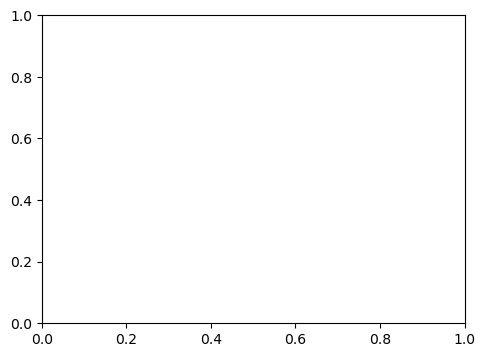

In [44]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


# Assuming model, X_test, and y_test are defined
# Convert predictions to class indices
X_test = X_test.reshape(-1, 300, 40)  # Reshape to (294, 300, 40)

y_pred_classes = np.argmax(model.predict(X_test), axis=1)  # Get predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class names (Modify this according to your dataset)
class_names = ['Sad', 'Happy', 'Surprise', 'Angry', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and accuracy
report = classification_report(y_test, y_pred_classes, target_names=class_names)
accuracy = accuracy_score(y_test, y_pred_classes)

# Print the results
print("Classification Report:")
print(report)
print(f"Overall Accuracy: {accuracy:.4f}")